 Importing the Dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score , precision_score , recall_score , f1_score,matthews_corrcoef

Dataset

In [2]:
credit_card_dataset = pd.read_csv("creditcard.csv")

In [3]:
credit_card_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_dataset.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
 #dataset information 
 credit_card_dataset.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the missing number in each column 
credit_card_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

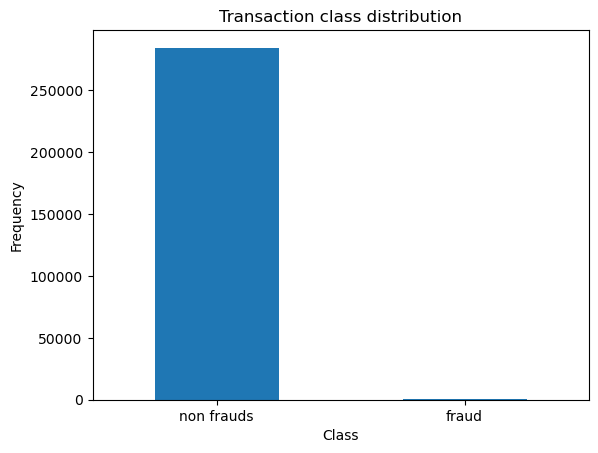

In [7]:
labels = ['non frauds','fraud']
classes = pd.value_counts(credit_card_dataset['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
#distrubition of legit transction &fraudlent transction 
credit_card_dataset['Class'].value_counts()



0    284315
1       492
Name: Class, dtype: int64

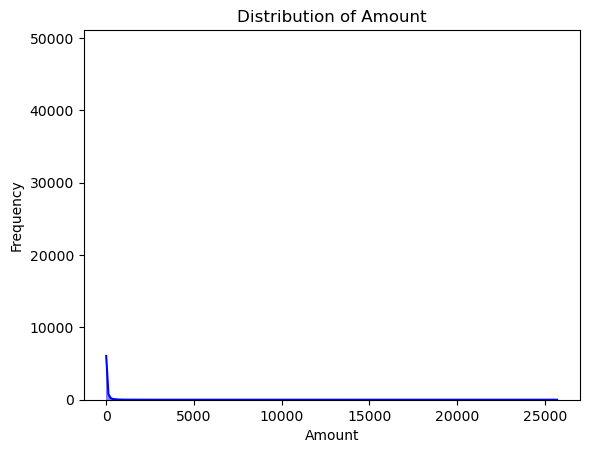

In [9]:
# distribution of Amount
amount = credit_card_dataset['Amount'].values
sns.histplot(data=amount, kde=True, color='blue')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

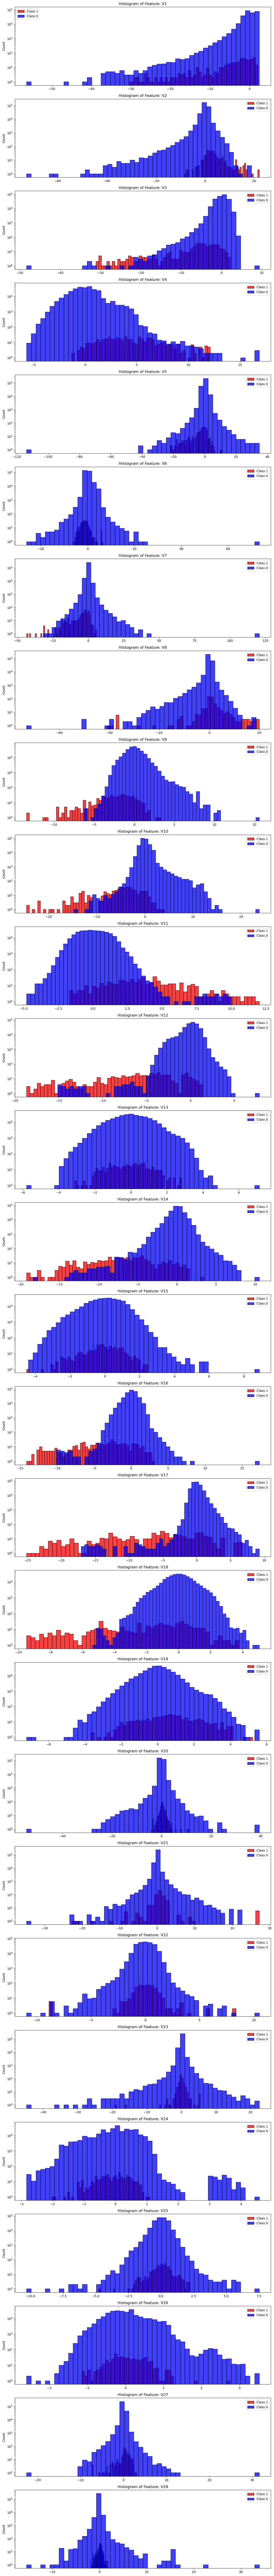

In [10]:
#anomalous_features = credit_card_dataset.iloc[:, 1:29].columns

#plt.figure(figsize=(12, 28*4))
#for i, cn in enumerate(anomalous_features):
  #  plt.subplot(28, 1, i+1)
  #  sns.histplot(credit_card_dataset[cn][credit_card_dataset.Class == 1], bins=50, color='red', label='Class 1')
 #   sns.histplot(credit_card_dataset[cn][credit_card_dataset.Class == 0], bins=50, color='blue', label='Class 0')
   # plt.xlabel('')
   # plt.title('Histogram of Feature: ' + str(cn))
   # plt.legend()
#plt.tight_layout()
#plt.show()
anomalous_features = credit_card_dataset.iloc[:, 1:29].columns

plt.figure(figsize=(12, 28*4))
for i, cn in enumerate(anomalous_features):
    plt.subplot(28, 1, i+1)
    sns.histplot(credit_card_dataset[cn][credit_card_dataset.Class == 1], bins=50, color='red', label='Class 1')
    sns.histplot(credit_card_dataset[cn][credit_card_dataset.Class == 0], bins=50, color='blue', label='Class 0')
    plt.xlabel('')
    plt.title('Histogram of Feature: ' + str(cn))
    plt.yscale('log')  # Use logarithmic scale for y-axis
    plt.legend()
plt.tight_layout()
plt.show()



This Dataset is highly unblanced 

0-->Normal Transction 
1-->Fraudent Transction

In [10]:
#Seperating data for analysis
legit = credit_card_dataset[credit_card_dataset.Class == 0]
fraud = credit_card_dataset[credit_card_dataset.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# Stastical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Compare the values for both transctions 
credit_card_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling



Build a sample dataset containing similar distrubtion of normal transaction and Fraudulent Transctions 



Number of Fraudulent Tansctions --> 492

In [15]:
legit_sample = legit.sample(n=492)


Concatenating two DataFrames

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
66124,51900.0,-0.530944,0.324696,2.081863,-0.073111,-0.902749,-0.278262,0.246082,0.254747,-0.104392,...,0.200134,0.309546,0.164589,0.494390,-0.727113,0.272608,0.083067,0.147842,79.90,0
159879,113018.0,-1.756052,-1.436418,0.700478,1.216030,2.931955,-1.337438,-0.962643,0.139724,-0.318032,...,0.421747,0.628861,-0.196850,0.113700,0.931693,0.163193,0.023731,0.120031,1.00,0
68437,52991.0,0.420921,1.897841,-1.828809,1.420861,1.039511,-1.553274,1.025084,-0.320654,-0.045421,...,-0.208562,-0.091084,0.054944,-0.031922,-0.422768,-0.437122,0.298744,-0.099224,1.79,0
191212,129162.0,-0.264021,0.724174,0.986521,-0.340142,0.763351,-0.944505,1.290201,-0.477513,-0.338276,...,-0.212072,-0.366391,-0.164016,0.078632,-0.187240,0.319911,-0.105650,-0.094137,11.51,0
268288,163150.0,-0.042056,1.033997,-0.408928,-0.644235,1.138683,-0.702323,1.123618,-0.287047,0.305641,...,-0.428087,-0.833771,0.058575,0.411014,-0.395103,0.101599,0.175616,-0.079227,9.98,0


In [18]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94725.638211,-0.105084,-0.038431,0.052132,0.011649,0.032503,-0.074544,0.002388,-0.001101,0.036768,...,-0.070722,-0.015558,0.036182,-0.008030,0.000913,-0.037053,-0.025310,0.000089,0.011701,75.333862
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
66124    51900.0 -0.530944  0.324696  2.081863 -0.073111 -0.902749 -0.278262   
159879  113018.0 -1.756052 -1.436418  0.700478  1.216030  2.931955 -1.337438   
68437    52991.0  0.420921  1.897841 -1.828809  1.420861  1.039511 -1.553274   
191212  129162.0 -0.264021  0.724174  0.986521 -0.340142  0.763351 -0.944505   
268288  163150.0 -0.042056  1.033997 -0.408928 -0.644235  1.138683 -0.702323   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

66124     0
159879    0
68437     0
191212    0
268288    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


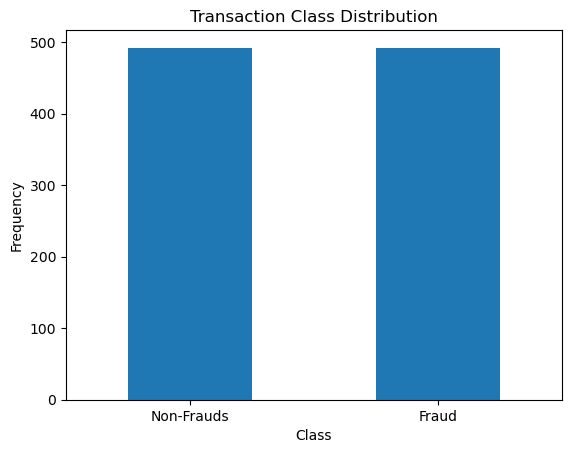

In [23]:
labels = ['Non-Frauds', 'Fraud']
new_classes = pd.value_counts(new_dataset['Class'], sort=True)
new_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


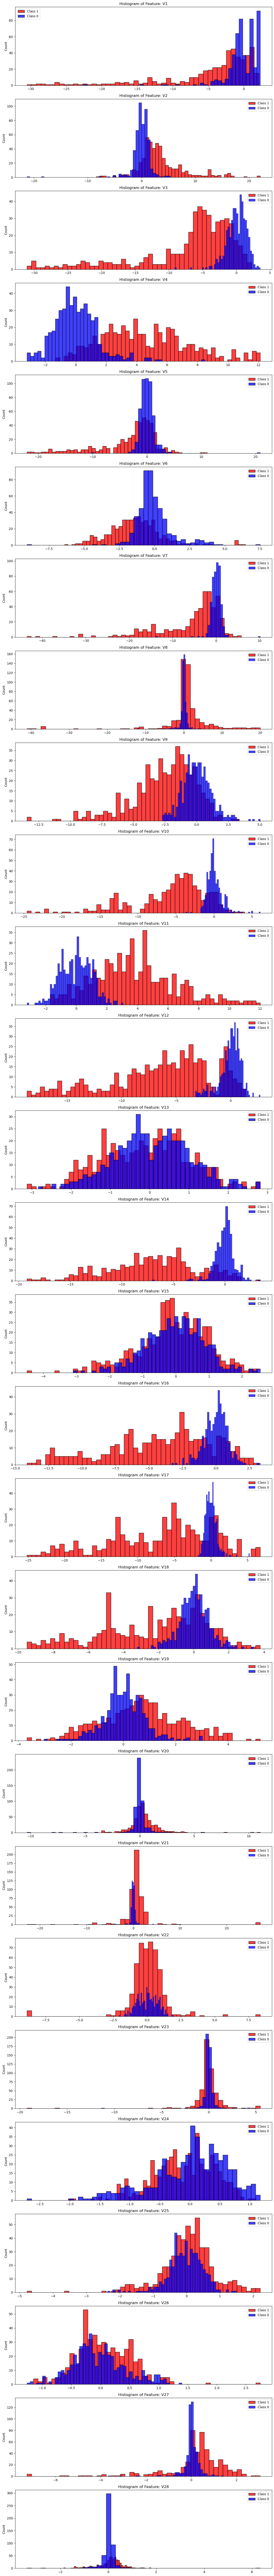

In [24]:
anomalous_features = new_dataset.iloc[:, 1:29].columns

plt.figure(figsize=(12, 28*4))
for i, cn in enumerate(anomalous_features):
    plt.subplot(28, 1, i+1)
    sns.histplot(new_dataset[cn][new_dataset.Class == 1], bins=50, color='red', label='Class 1')
    sns.histplot(new_dataset[cn][new_dataset.Class == 0], bins=50, color='blue', label='Class 0')
    plt.xlabel('')
    plt.title('Histogram of Feature: ' + str(cn))
    plt.legend()
plt.tight_layout()
plt.show()

Spliting the data into Training data & Testing Data

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model training 

In [52]:
model = LogisticRegression(max_iter = 1000)

In [53]:
# Training the Logistic Rgression Model with Training Data 
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evalution 


Accurarcy Score 

In [54]:
# Accuracy on training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train )

In [55]:
print("Accuracy on Training data : " , training_data_accuracy)

Accuracy on Training data :  0.5006353240152478


In [56]:
# Accurancy on test data 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [57]:
print("Accuracy on Test data : " , test_data_accuracy)

Accuracy on Test data :  0.49746192893401014


D:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


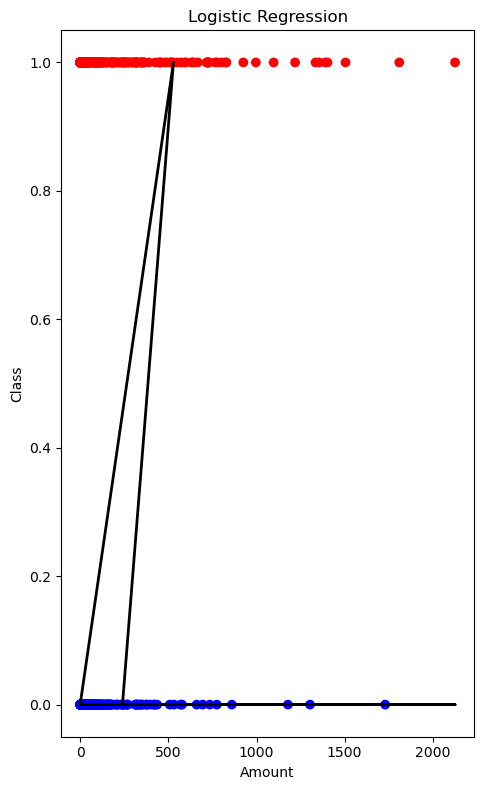

In [58]:
# Plotting the logistic regression graph
plt.subplot(1, 3, 3)
plt.scatter(new_dataset['Amount'], new_dataset['Class'], color=['blue' if c == 0 else 'red' for c in new_dataset['Class']])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Logistic Regression')
plt.plot(new_dataset['Amount'], model.predict_proba(X)[:, 1], color='black', linewidth=2)

plt.tight_layout()
plt.show()

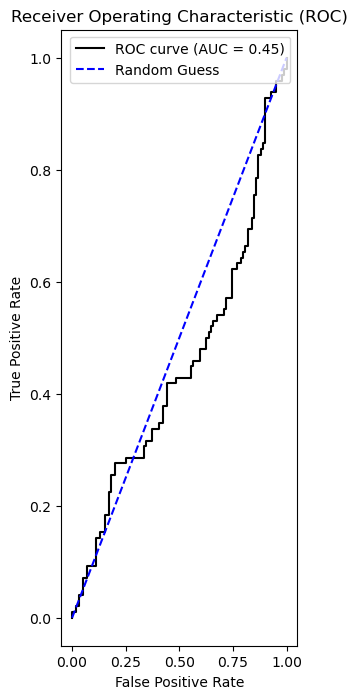

In [59]:
# Plotting the ROC curve
plt.subplot(1, 4, 4)
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc = roc_auc_score(Y_test, y_probs)
plt.plot(fpr, tpr, color='black', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()


Decision Tree Model 

In [60]:
model_dt = DecisionTreeClassifier()

In [61]:
# Training the Descision Tree Model with Training Data 
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [37]:
# Accuracy on training data 
X_train_prediction_dt = model_dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)
print("Decision Tree - Accuracy on Training data:", training_data_accuracy_dt)

Decision Tree - Accuracy on Training data: 1.0


In [38]:
# Accuracy on test data 
X_test_prediction_dt = model_dt.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)
print("Decision Tree - Accuracy on Test data:", test_data_accuracy_dt)

Decision Tree - Accuracy on Test data: 0.868020304568528


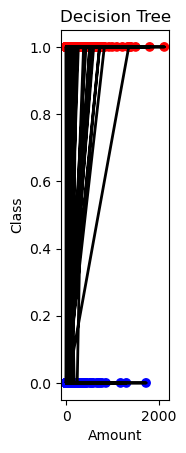

In [39]:
plt.subplot(1, 4, 4)
plt.scatter(new_dataset['Amount'], new_dataset['Class'], color=['blue' if c == 0 else 'red' for c in new_dataset['Class']])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Decision Tree')
plt.plot(new_dataset['Amount'], model_dt.predict_proba(X)[:, 1], color='black', linewidth=2)

In [40]:
# Make predictions on the test set
Y_probs = model.predict_proba(X_test)[:, 1]

In [41]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)

In [42]:
# Compute the area under the ROC curve (AUC)
auc_score = roc_auc_score(Y_test, y_probs)


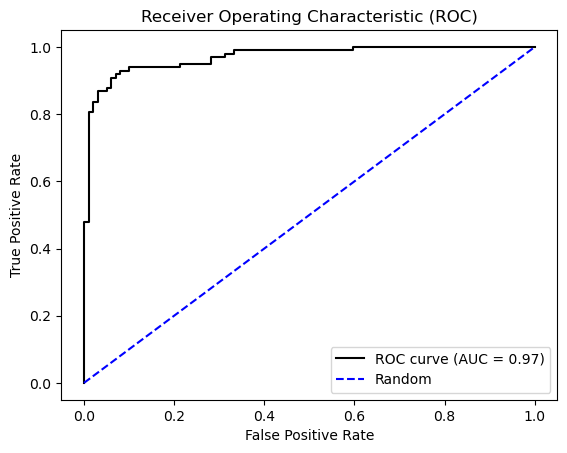

In [43]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='black', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Now we use KNN Alghorithm 


KNN Model 

In [44]:
 # normalize: Scale input vectors individually to unit norm (vector length).
 X_train = normalize(X_train)
 X_test=normalize(X_test)

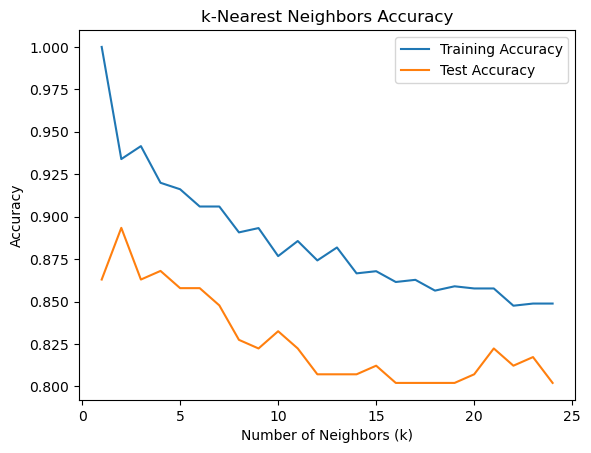

In [45]:
neighbours = np.arange(1, 25)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs=-1)
    knn.fit(X_train, Y_train.ravel())
    train_accuracy[i] = knn.score(X_train, Y_train.ravel())
    test_accuracy[i] = knn.score(X_test, Y_test.ravel())

plt.plot(neighbours, train_accuracy, label='Training Accuracy')
plt.plot(neighbours, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-Nearest Neighbors Accuracy')
plt.legend()
plt.show()


In [46]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]


In [47]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,Y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [48]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

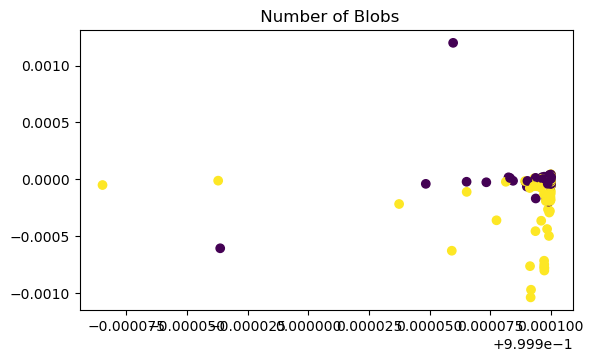

In [49]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [50]:
#scoring knn
knn_accuracy_score  = accuracy_score(Y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(Y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(Y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(Y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(Y_test,knn_predicted_test_labels)

In [57]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)


K-Nearest Neighbours
Scores
Accuracy --> 0.883248730964467
Precison --> 0.9120879120879121
Recall --> 0.8469387755102041
F1 --> 0.8783068783068784
MCC --> 0.7683513680399793
